# Flipkart – Cart Value Comparison: Mobile vs Web

## 📌 Problem Statement
Flipkart wants to know if the **average cart value** differs significantly between users on **Mobile** and **Web** platforms.

## 🧠 5W1H

- **What**: Cart value (₹)
- **Why**: To optimize platform-specific offers and UI
- **When**: Past month’s data
- **Where**: Across major Indian states
- **Who**: 2,000 customers sampled equally from Mobile and Web
- **How**: Two-Sample Z-Test (σ known)


In [3]:
import numpy as np
import pandas as pd

np.random.seed(2025)

n = 2000
states = ['Maharashtra', 'Karnataka', 'Delhi', 'Gujarat', 'Tamil Nadu']
user_types = ['New', 'Returning']
platforms = ['Mobile', 'Web']

# Generate sample
df = pd.DataFrame({
    'Customer_ID': np.arange(1, n + 1),
    'State': np.random.choice(states, n),
    'Platform': np.random.choice(platforms, n, p=[0.5, 0.5]),
    'User_Type': np.random.choice(user_types, n, p=[0.3, 0.7]),
})

# Cart values (simulate different means & known population std)
df['Cart_Value'] = df['Platform'].apply(lambda x: 
    np.random.normal(loc=1550, scale=300) if x == 'Mobile' else np.random.normal(loc=1500, scale=300)
)

df.head()


,Customer_ID,State,Platform,User_Type,Cart_Value
0,1,Delhi,Web,New,1462.221846
1,2,Tamil Nadu,Mobile,Returning,1811.400715
2,3,Maharashtra,Web,Returning,1451.394233
3,4,Gujarat,Mobile,New,1855.062874
4,5,Gujarat,Mobile,New,1867.404323


Customer_ID    0
State          0
Platform       0
User_Type      0
Cart_Value     0
dtype: int64


C:\Windows\Temp\ipykernel_1592\2091800646.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Platform', y='Cart_Value', palette='Set3')


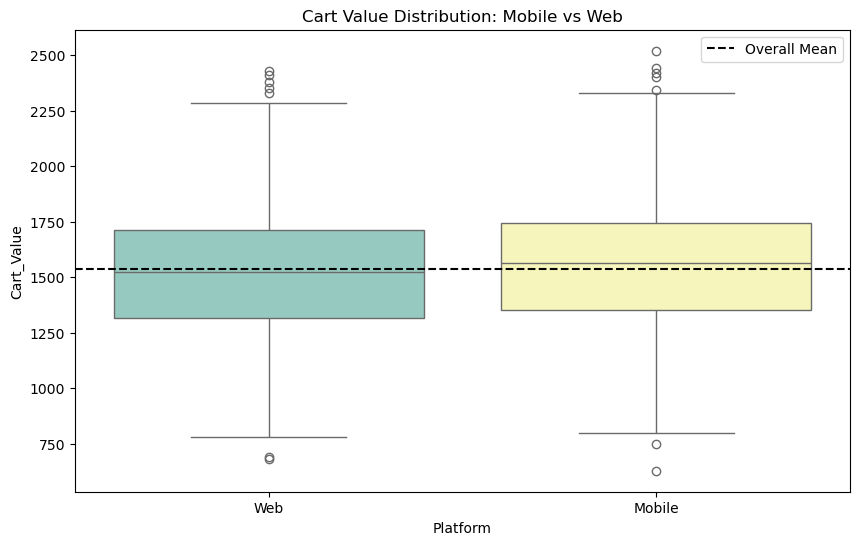

Platform
Mobile    1554.173496
Web       1520.568166
Name: Cart_Value, dtype: float64


In [7]:
# Null check
print(df.isnull().sum())

# Boxplot for EDA
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Platform', y='Cart_Value', palette='Set3')
plt.title('Cart Value Distribution: Mobile vs Web')
plt.axhline(df['Cart_Value'].mean(), linestyle='--', color='black', label='Overall Mean')
plt.legend()
plt.show()

# Group means
print(df.groupby('Platform')['Cart_Value'].mean())


In [9]:
from statsmodels.stats.weightstats import ztest

mobile = df[df['Platform'] == 'Mobile']['Cart_Value']
web = df[df['Platform'] == 'Web']['Cart_Value']

# H0: μ_Mobile = μ_Web
# H1: μ_Mobile ≠ μ_Web

z_stat, p_val = ztest(mobile, web, value=0, alternative='two-sided')

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_val:.4f}")


Z-Statistic: 2.5663
P-Value: 0.0103


## 🎯 Hypotheses

- H₀: μ_Mobile = μ_Web → No difference in cart value between platforms
- H₁: μ_Mobile ≠ μ_Web → Significant difference between platforms

### 📈 Interpretation

- If **p < 0.05** → Reject H₀ → Platform affects cart value
- If **p ≥ 0.05** → Fail to reject H₀ → No strong evidence of difference

## 💼 Business Impact

- ✅ If significant:
  - Mobile users have higher cart values → prioritize Mobile UI/UX, exclusive offers, and ads
  - Web users may need personalized nudges to increase spend
- ❌ If not significant:
  - Cart value consistent → platform-agnostic campaigns can work

